<span style="font-size: 250%; font-weight: bold">Strong Solutions</span>

# Table of Contents
* [1. Exercise 3.7](#1.-Exercise-3.7)
* [2. Exercise 3.9](#2.-Exercise-3.9)




# 1

Consider the geometric SDE
$$
dX_t=X_t\left[-2dt+2dB_t\right]
$$
We use the stochastic Euler method to simulate $X_t$ for $0\le t\le 2$, with $X_0=1$ and $\Delta t=0.01$.

a. Graph at least one simulation


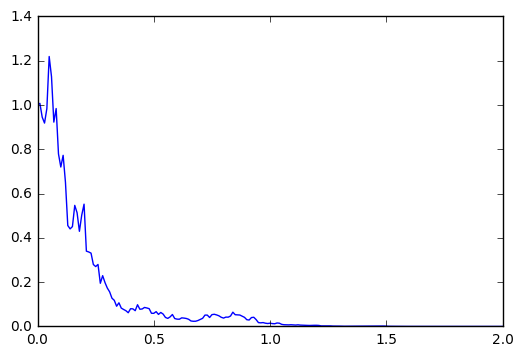

In [0]:
# %matplotlib inline
import numpy as np
from random import gauss
import matplotlib.pyplot as plt

# YOUR SOLUTION HERE
m = -2
sigma = 2
T=2
Delta=0.01
k=int(T/Delta)
x=np.zeros(k+1)
x[0] = 1
t=np.linspace(0,T,k+1)
for i in range(k):
    x[i+1]=x[i] + m*x[i]*Delta + sigma*x[i]*gauss(0, 1)*np.sqrt(Delta)
plt.plot(t,x)
None

b. Make a function that returns `True` if $X_2\ge 3$.


In [0]:
def Is_greater_three():
    """
    Simulate dX_t=X_t[-2dt+2dB_t] with X_0=1 for 0<= t <= 2, and determine whether X(2) >=3.

    Args:
        Nothing

    Returns:
        True if X(2) >= 3.

    """

    # YOUR CODE HERE
    if (x[200]) >= 3:
        return True
    else:
        return False



In [0]:
Is_greater_three()

False

c. Use the function you created to do at least $10000$ simulations and estimate $\mathbb{P}(X_2\ge 3)$.


In [0]:
M = 10000
s = 0
for j in range(M):
    for i in range(k):
        x[i+1]=x[i] + m*x[i]*Delta + sigma*x[i]*gauss(0, 1)*np.sqrt(Delta)
    Is_greater_three()
    s += int( Is_greater_three() )
print float(s)/M

0.0009


d. We compute the exact probability (up to three decimal places) that $X_2\ge 3$ and then compare this to your simulations.

The strong solution can be written as
$$
X_t = X_0 e^{\left(m-\frac{\sigma}{2}\right)t+\sigma B_t}=e^{-4t}e^{2B_t}
$$
Therefore
\begin{align*}
\mathbb{P}(X_2\ge 3) & = ...
\end{align*}

$P(x_2 \geq 3)= P(e^{-8} . e^{2B_2}) \geq 3 = P(Ln(e^{-8}*e^{2B_2}) \geq Ln(3) )= P(B_2 \geq \frac{Ln3+8}{2}) = P(\sqrt2 B_1 \geq \frac{Ln3+8}{2}) = \int_{\frac{Ln3+8}{2\sqrt2}}^{\infty} \frac{1}{\sqrt{2 \pi}} e^{-t^2/2} dt$

In [0]:
import scipy.stats as sps
import numpy as np
import math


# YOUR CODE HERE


sps.norm.cdf(((math.log(3)+8)/2*np.sqrt(2)))



0.99999999993772881

# 2.

First we simulate $B_t$ for $0\le t\le 1$, using a sequence $N_1,N_2,\dots$ of i.i.d. standard normal variables and the scheme
$$
B_{k\Delta t}=B_{(k-1)\Delta t}+\sqrt{\Delta t} N_k.
$$

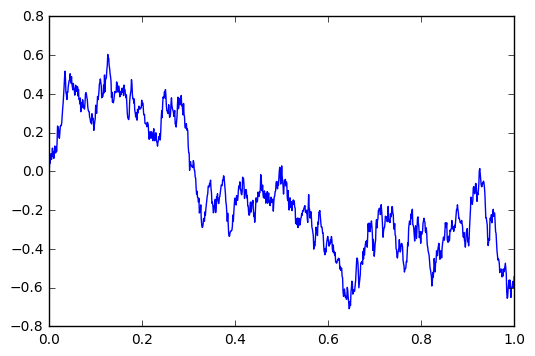

In [0]:
# random seed (try changing this value and see what happens)
seed = 4889182

# set up the PRNGs
import random as rnd
import numpy.random as nrnd
rnd.seed(seed)
nrnd.seed(seed)

# number of steps
N = 1000

# length of the interval [0,T]
T = 1.0

# time increments
Delta = T/N

# times
t = np.linspace(0,T,N+1)

# initialize the vector B
B = []

# compute a sequence of normal increments
Y = np.random.normal(0, 1, N)

B = np.cumsum( np.insert( Y*np.sqrt(Delta) , 0, 0 ) )

# plot the function
plt.plot(t,B)

None

Let $m=1$, $\sigma=2$, and $\Delta t=0.001$, and consider the geometric Brownian motion
$$
dX_t = X_t dt+2X_t dB_t,\qquad X_0=1
$$

a. We use the __same__ sequence of $N_k$ (namely the variable $Y$ in the code above) used to simulate Brownian Motion above to simulate $X_t$ as follow:
$$
X_{k\Delta t}=X_{(k-1)\Delta t}+X_{(k-1)\Delta t}\left[m\Delta t+\sigma\sqrt{\Delta t}N_k\right]
$$


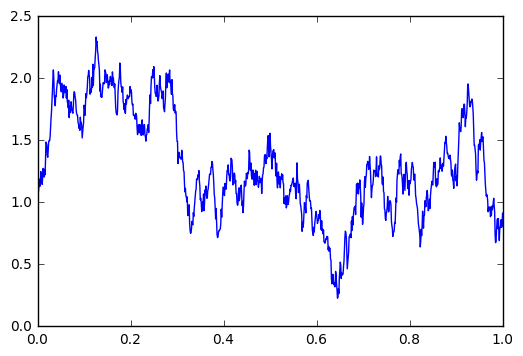

In [0]:
# YOUR CODE HERE
m=1
sigma=2
delta=0.001
x = np.cumsum(np.insert( m*delta + sigma*np.sqrt(Delta)*Y , 0, 1 ) )
plt.plot(t,x)

b. Now we simulate the strong solution
$$
Z_{k\Delta t}=\exp\left\{\left(m-\frac{\sigma^2}{2}\right)(k\Delta t)+\sigma B_{k\Delta t}\right\}
$$


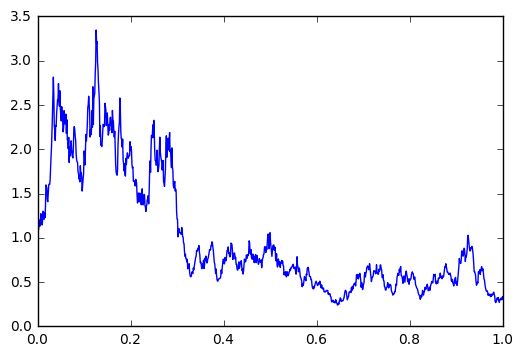

In [0]:
# YOUR CODE HERE
z=np.exp((m-(sigma)**2/2)*(t*Delta)+sigma*B)
plt.plot(t,z)

#### c. Repeat this at least $20$ times and compare $X_{1/4},X_{1/2},X_{3/4},X_1$ to $Z_{1/4},Z_{1/2},Z_{3/4},Z_1$ each time (for instance using `plt.bar`).

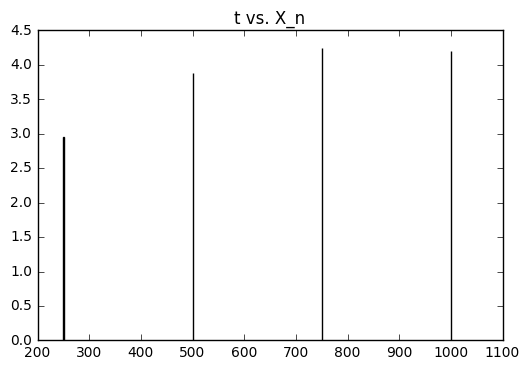

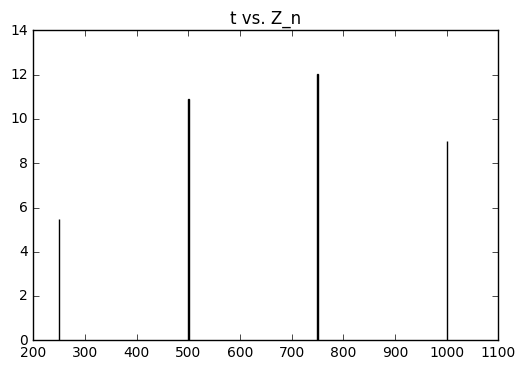

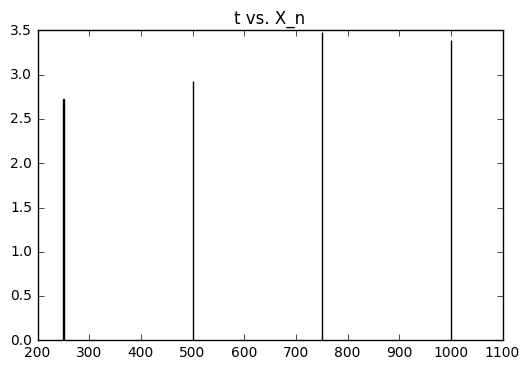

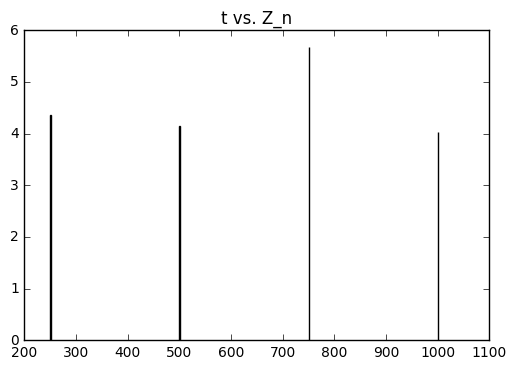

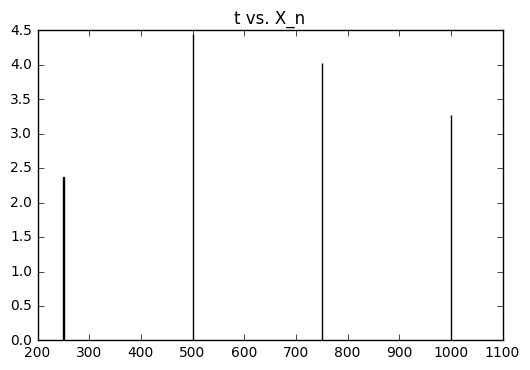

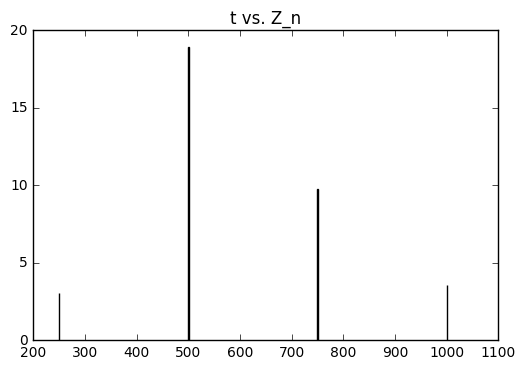

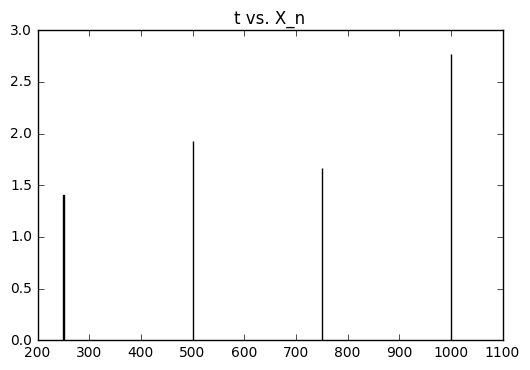

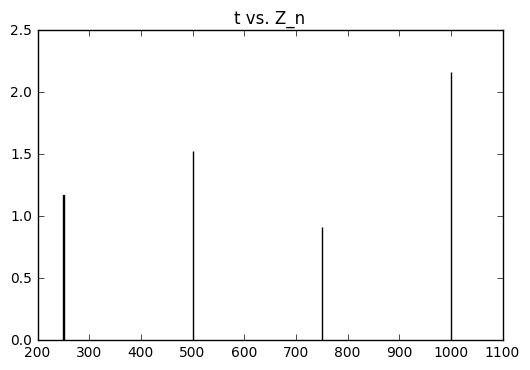

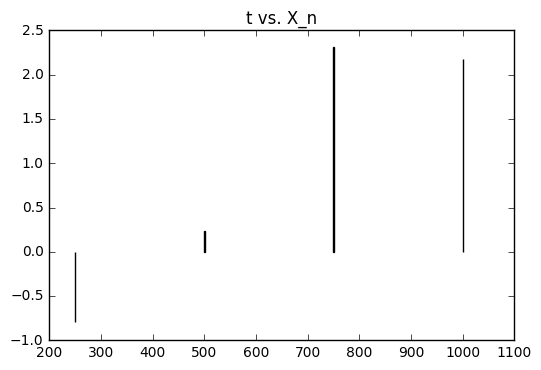

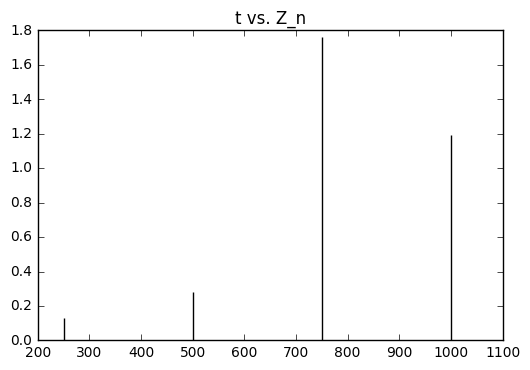

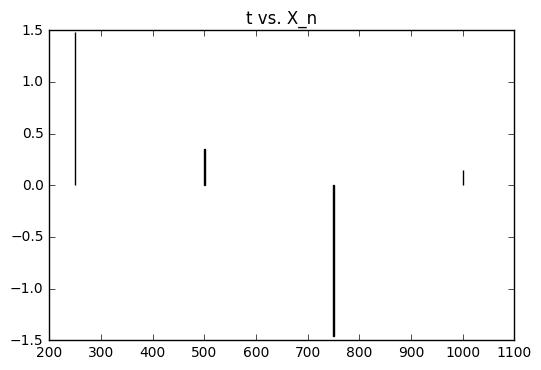

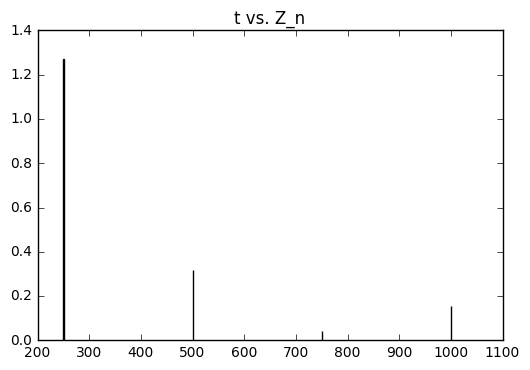

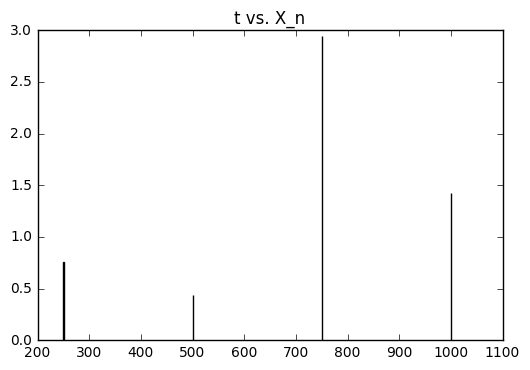

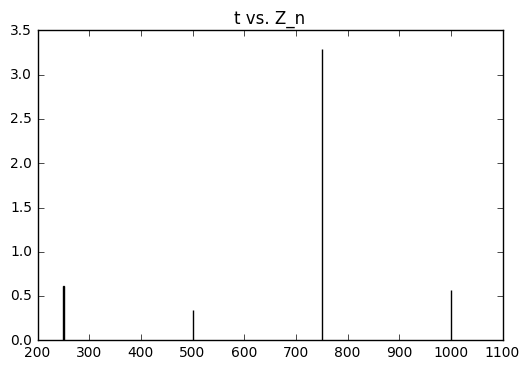

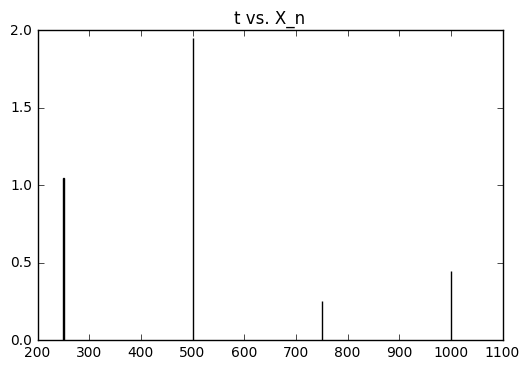

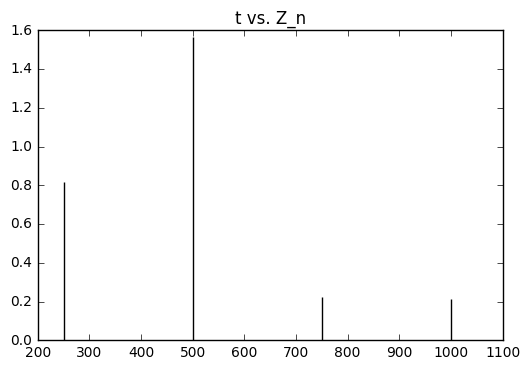

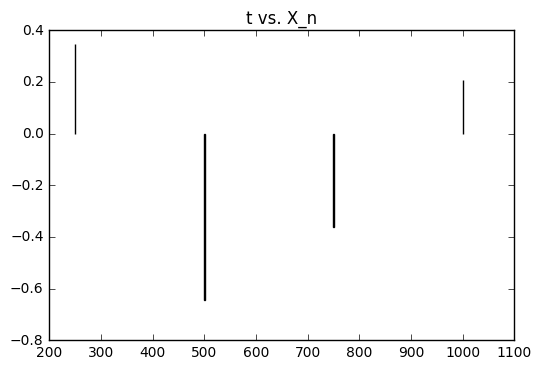

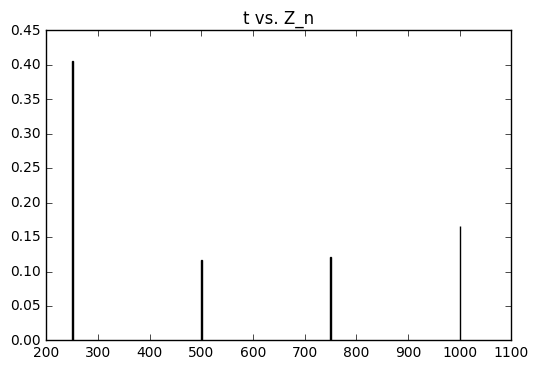

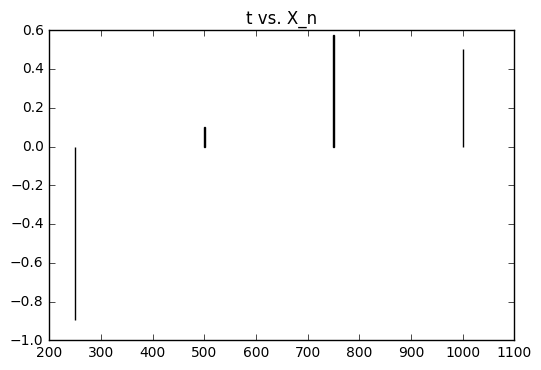

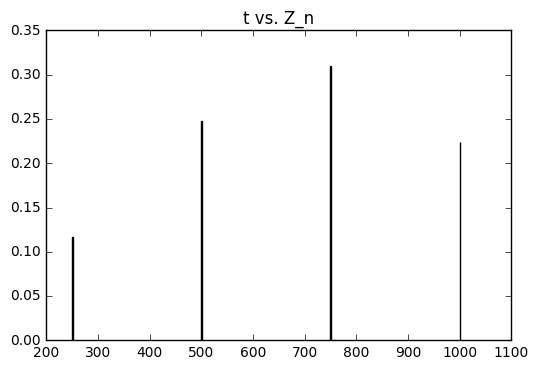

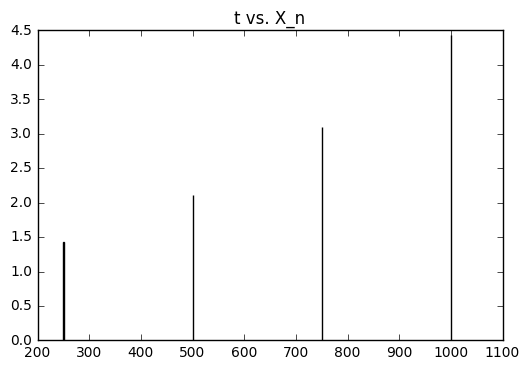

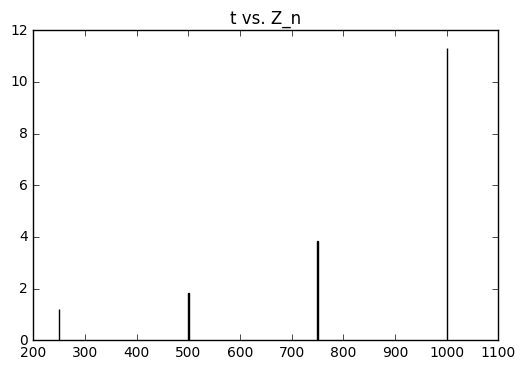

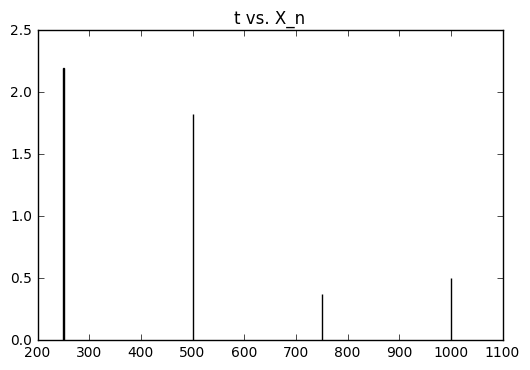

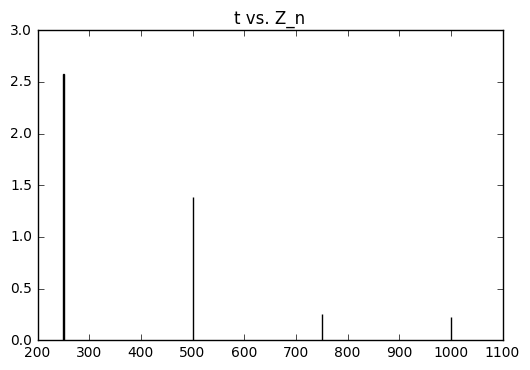

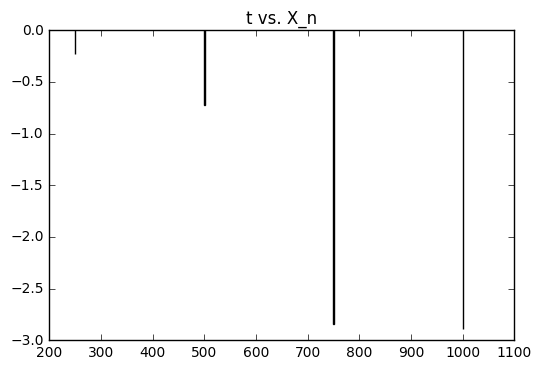

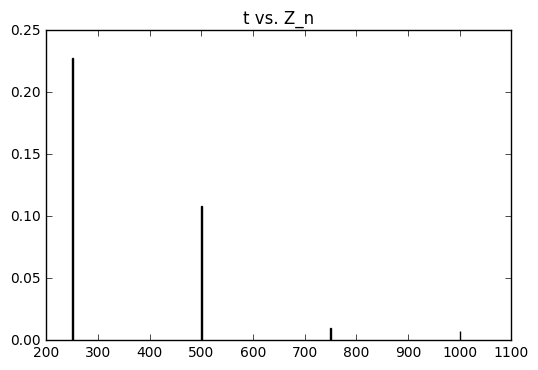

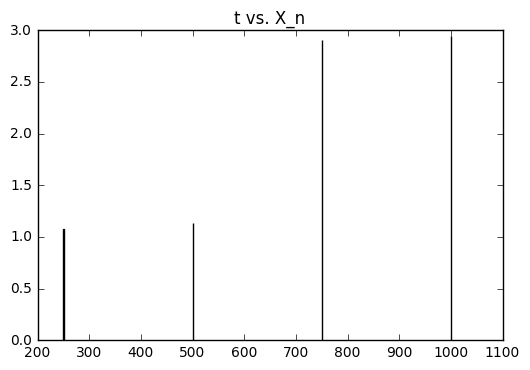

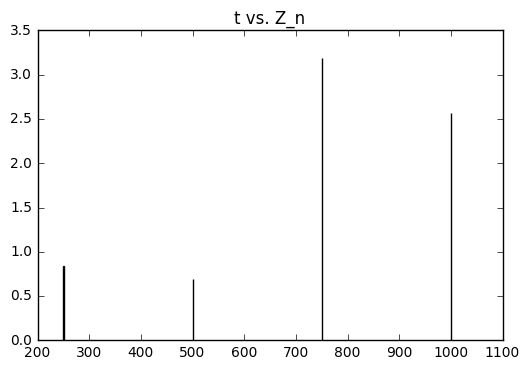

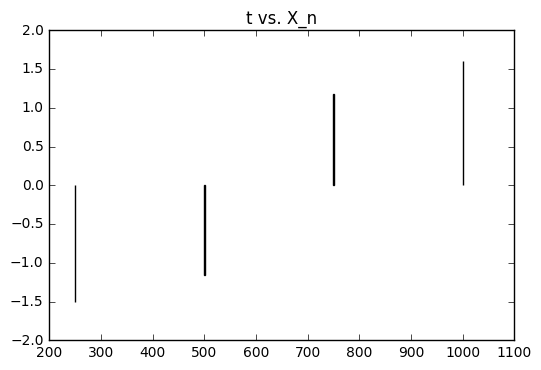

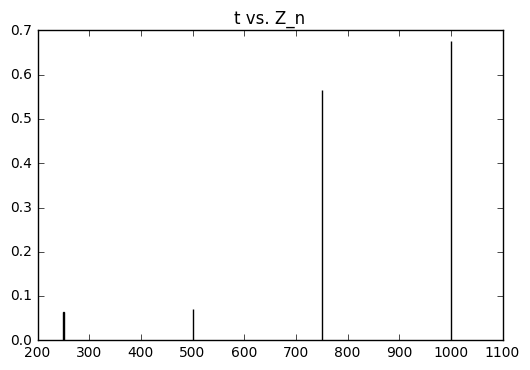

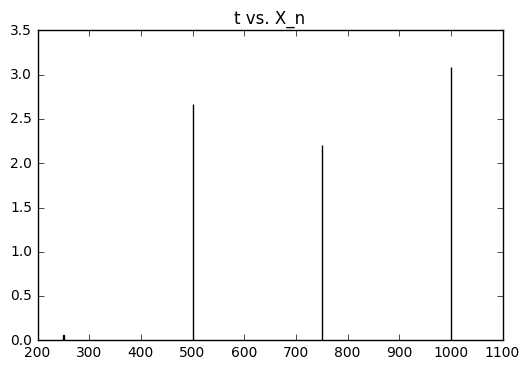

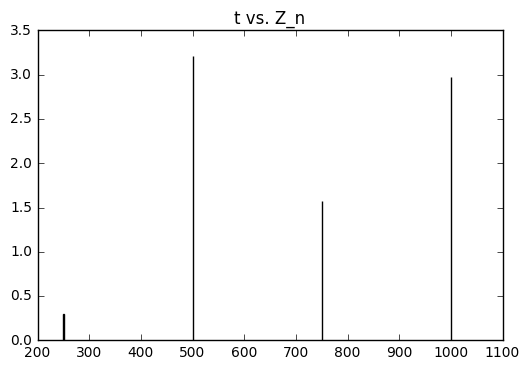

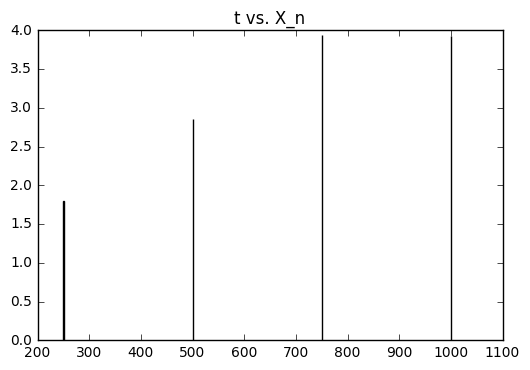

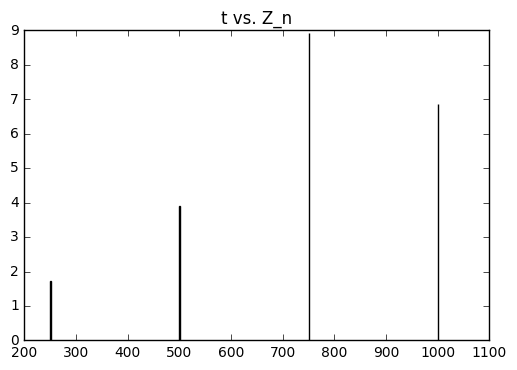

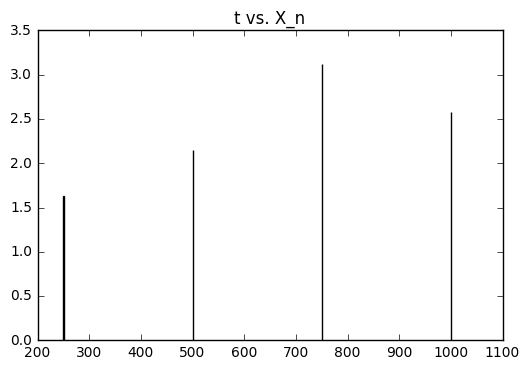

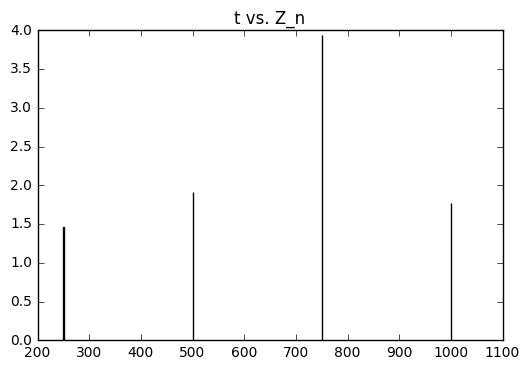

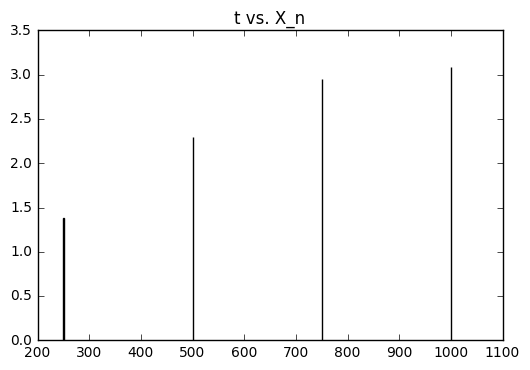

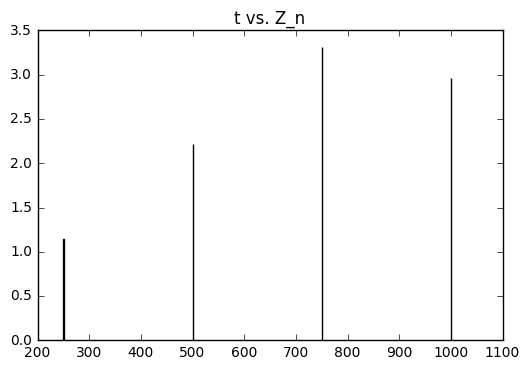

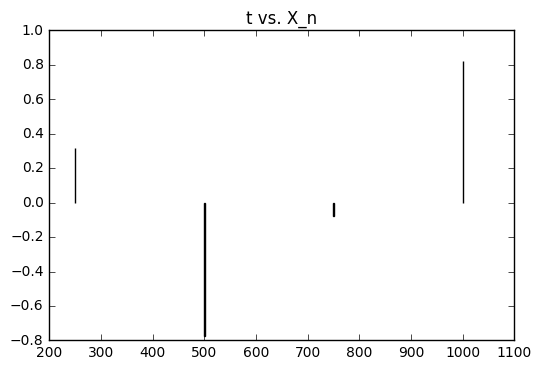

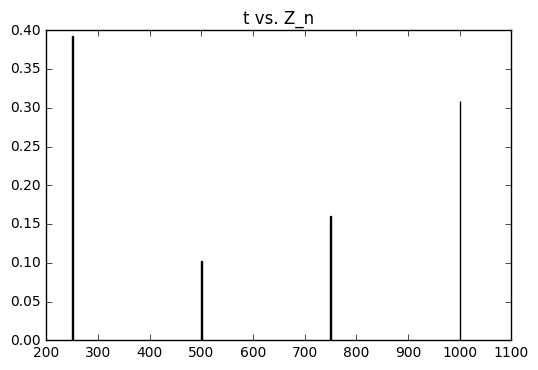

In [0]:
# YOUR CODE HERE
x_new=np.zeros([20,4])
z_new=np.zeros([20,4])
for j in range(20):
    pos=(250,500,750,1000)
    Y = np.random.normal(0, 1, N)
    B = np.cumsum( np.insert( Y*np.sqrt(Delta) , 0, 0 ) )
    x = np.cumsum(np.insert( m*delta + sigma*Y*np.sqrt(Delta) , 0, 1 ) )
    z=np.exp((m-(sigma)**2/2)*(t*Delta)+sigma*B)
    x_new[j,:]=[x[250],x[500],x[750],x[1000]]
    z_new[j,:]=[z[250],z[500],z[750],z[1000]] 
    plt.bar(pos,x_new[j,:],color='b')
    plt.title('t vs. X_n')
    plt.show()
    plt.bar(pos,z_new[j,:],color='y')
    plt.title('t vs. Z_n')
    plt.show()
